In [1]:
import numpy as np
import pandas as pd

In [2]:
df_financials = pd.read_csv('Financials.csv')

First Look at Data

In [3]:
df_financials.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


In [5]:
df_financials.describe()

,Month Number,Year
count,700.000000,700.000000
mean,7.900000,2013.750000
std,3.377321,0.433322
min,1.000000,2013.000000
25%,5.750000,2013.750000
50%,9.000000,2014.000000
75%,10.250000,2014.000000
max,12.000000,2014.000000


Since only Month and Year are Included - rest supposedly numeric data is left out - we will start data cleaning

In [6]:
df_financials.dtypes

Segment                  object
Country                  object
 Product                 object
 Discount Band           object
 Units Sold              object
 Manufacturing Price     object
 Sale Price              object
 Gross Sales             object
 Discounts               object
  Sales                  object
 COGS                    object
 Profit                  object
Date                     object
Month Number              int64
 Month Name              object
Year                      int64
dtype: object

Getting column names to see if the above output has spaces because of some error or there is actually spaces that need to be removed in column names

In [7]:
df_financials.columns

Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')

In [8]:
#stripping columns of white space
df_financials.columns = df_financials.columns.str.strip()

In [11]:
#now taking numerical columns and stripping them of $, , etc as they turn these numeric values to string objects
cols = ['Units Sold', 'Manufacturing Price', 'Discounts','Sale Price', 'Gross Sales', 'Sales', 'COGS', 'Profit']
def clean_numeric(val):
    if pd.isna(val):
        return np.nan
    val = str(val).strip()
    val = val.replace('$', '').replace(',', '').replace(' ', '')
    if val.startswith('(') and val.endswith(')'):
        val = '-' + val[1:-1]
    try:
        return float(val)
    except:
        return np.nan

df_financials[cols] = df_financials[cols].map(clean_numeric)

In [12]:
df_financials.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,NaN,32370.0,16185.0,16185.0,01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,NaN,26420.0,13210.0,13210.0,01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,NaN,32670.0,21780.0,10890.0,01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,NaN,13320.0,8880.0,4440.0,01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,NaN,37050.0,24700.0,12350.0,01/06/2014,6,June,2014


In [21]:
df_financials[['Month Number','Year','Units Sold','Manufacturing Price','Sale Price','Gross Sales','Sales','COGS','Profit']]=df_financials[['Month Number','Year','Units Sold','Manufacturing Price','Sale Price','Gross Sales','Sales','COGS','Profit']].astype(float)

In [14]:
df_financials.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,NaN,32370.0,16185.0,16185.0,01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,NaN,26420.0,13210.0,13210.0,01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,NaN,32670.0,21780.0,10890.0,01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,NaN,13320.0,8880.0,4440.0,01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,NaN,37050.0,24700.0,12350.0,01/06/2014,6,June,2014


Now moving onto statistical analysis

In [22]:
df_financials.describe()

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Month Number,Year
count,700.000000,700.000000,700.000000,7.000000e+02,647.000000,7.000000e+02,700.000000,695.000000,700.000000,700.000000
mean,1608.294286,96.477143,118.428571,1.827594e+05,14227.586198,1.696091e+05,145475.211429,24307.485309,7.900000,2013.750000
std,867.427859,108.602612,136.775515,2.542623e+05,23562.833079,2.367263e+05,203865.506118,42865.115657,3.377321,0.433322
min,200.000000,3.000000,7.000000,1.799000e+03,18.410000,1.655080e+03,918.000000,-40617.500000,1.000000,2013.000000
25%,905.000000,5.000000,12.000000,1.739175e+04,1061.000000,1.592800e+04,7490.000000,2929.320000,5.750000,2013.750000
50%,1542.500000,10.000000,20.000000,3.798000e+04,3108.000000,3.554020e+04,22506.250000,9297.000000,9.000000,2014.000000
75%,2229.125000,250.000000,300.000000,2.790250e+05,18809.250000,2.610775e+05,245607.500000,22777.500000,10.250000,2014.000000
max,4492.500000,260.000000,350.000000,1.207500e+06,149677.500000,1.159200e+06,950625.000000,262200.000000,12.000000,2014.000000


In [23]:
df_financials.describe(exclude = 'float')

,Segment,Country,Product,Discount Band,Date,Month Name
count,700,700,700,700,700,700
unique,5,5,6,4,16,12
top,Government,Canada,Paseo,High,01/06/2014,October
freq,300,140,202,245,70,140


In [25]:
df_financials.nunique()

Segment                  5
Country                  5
Product                  6
Discount Band            4
Units Sold             510
Manufacturing Price      6
Sale Price               7
Gross Sales            550
Discounts              514
Sales                  559
COGS                   545
Profit                 556
Date                    16
Month Number            12
Month Name              12
Year                     2
dtype: int64

In [42]:
df_financials.isnull().sum()

Segment                0
Country                0
Product                0
Discount Band          0
Units Sold             0
Manufacturing Price    0
Sale Price             0
Gross Sales            0
Discounts              0
Sales                  0
COGS                   0
Profit                 5
Date                   0
Month Number           0
Month Name             0
Year                   0
dtype: int64

In [35]:
df_financials.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,NaN,32370.0,16185.0,16185.0,01/01/2014,1.0,January,2014.0
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,NaN,26420.0,13210.0,13210.0,01/01/2014,1.0,January,2014.0
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,NaN,32670.0,21780.0,10890.0,01/06/2014,6.0,June,2014.0
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,NaN,13320.0,8880.0,4440.0,01/06/2014,6.0,June,2014.0
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,NaN,37050.0,24700.0,12350.0,01/06/2014,6.0,June,2014.0


In [38]:
mean_discount = df_financials['Discounts'].mean()

In [41]:
df_financials['Discounts']=df_financials['Discounts'].fillna(mean_discount)

In [43]:
df_financials.dropna(inplace = True)

In [44]:
correlation = df_financials.corr(numeric_only = True)

In [46]:
%pip install seaborn

In [47]:
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


<Axes: >

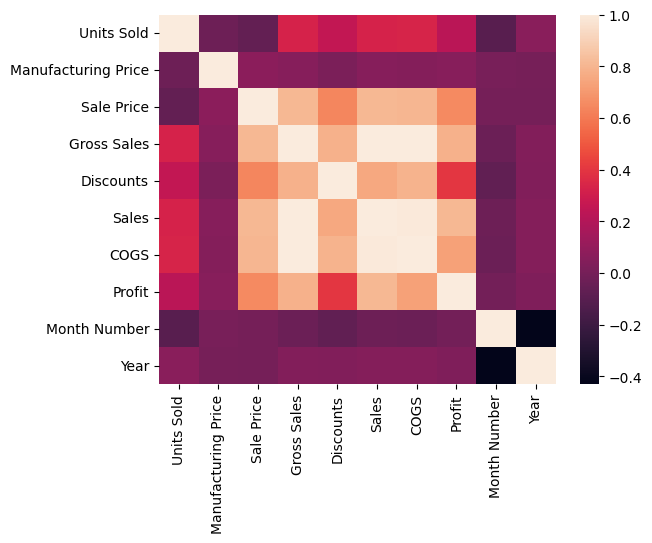

In [48]:
sns.heatmap(correlation)

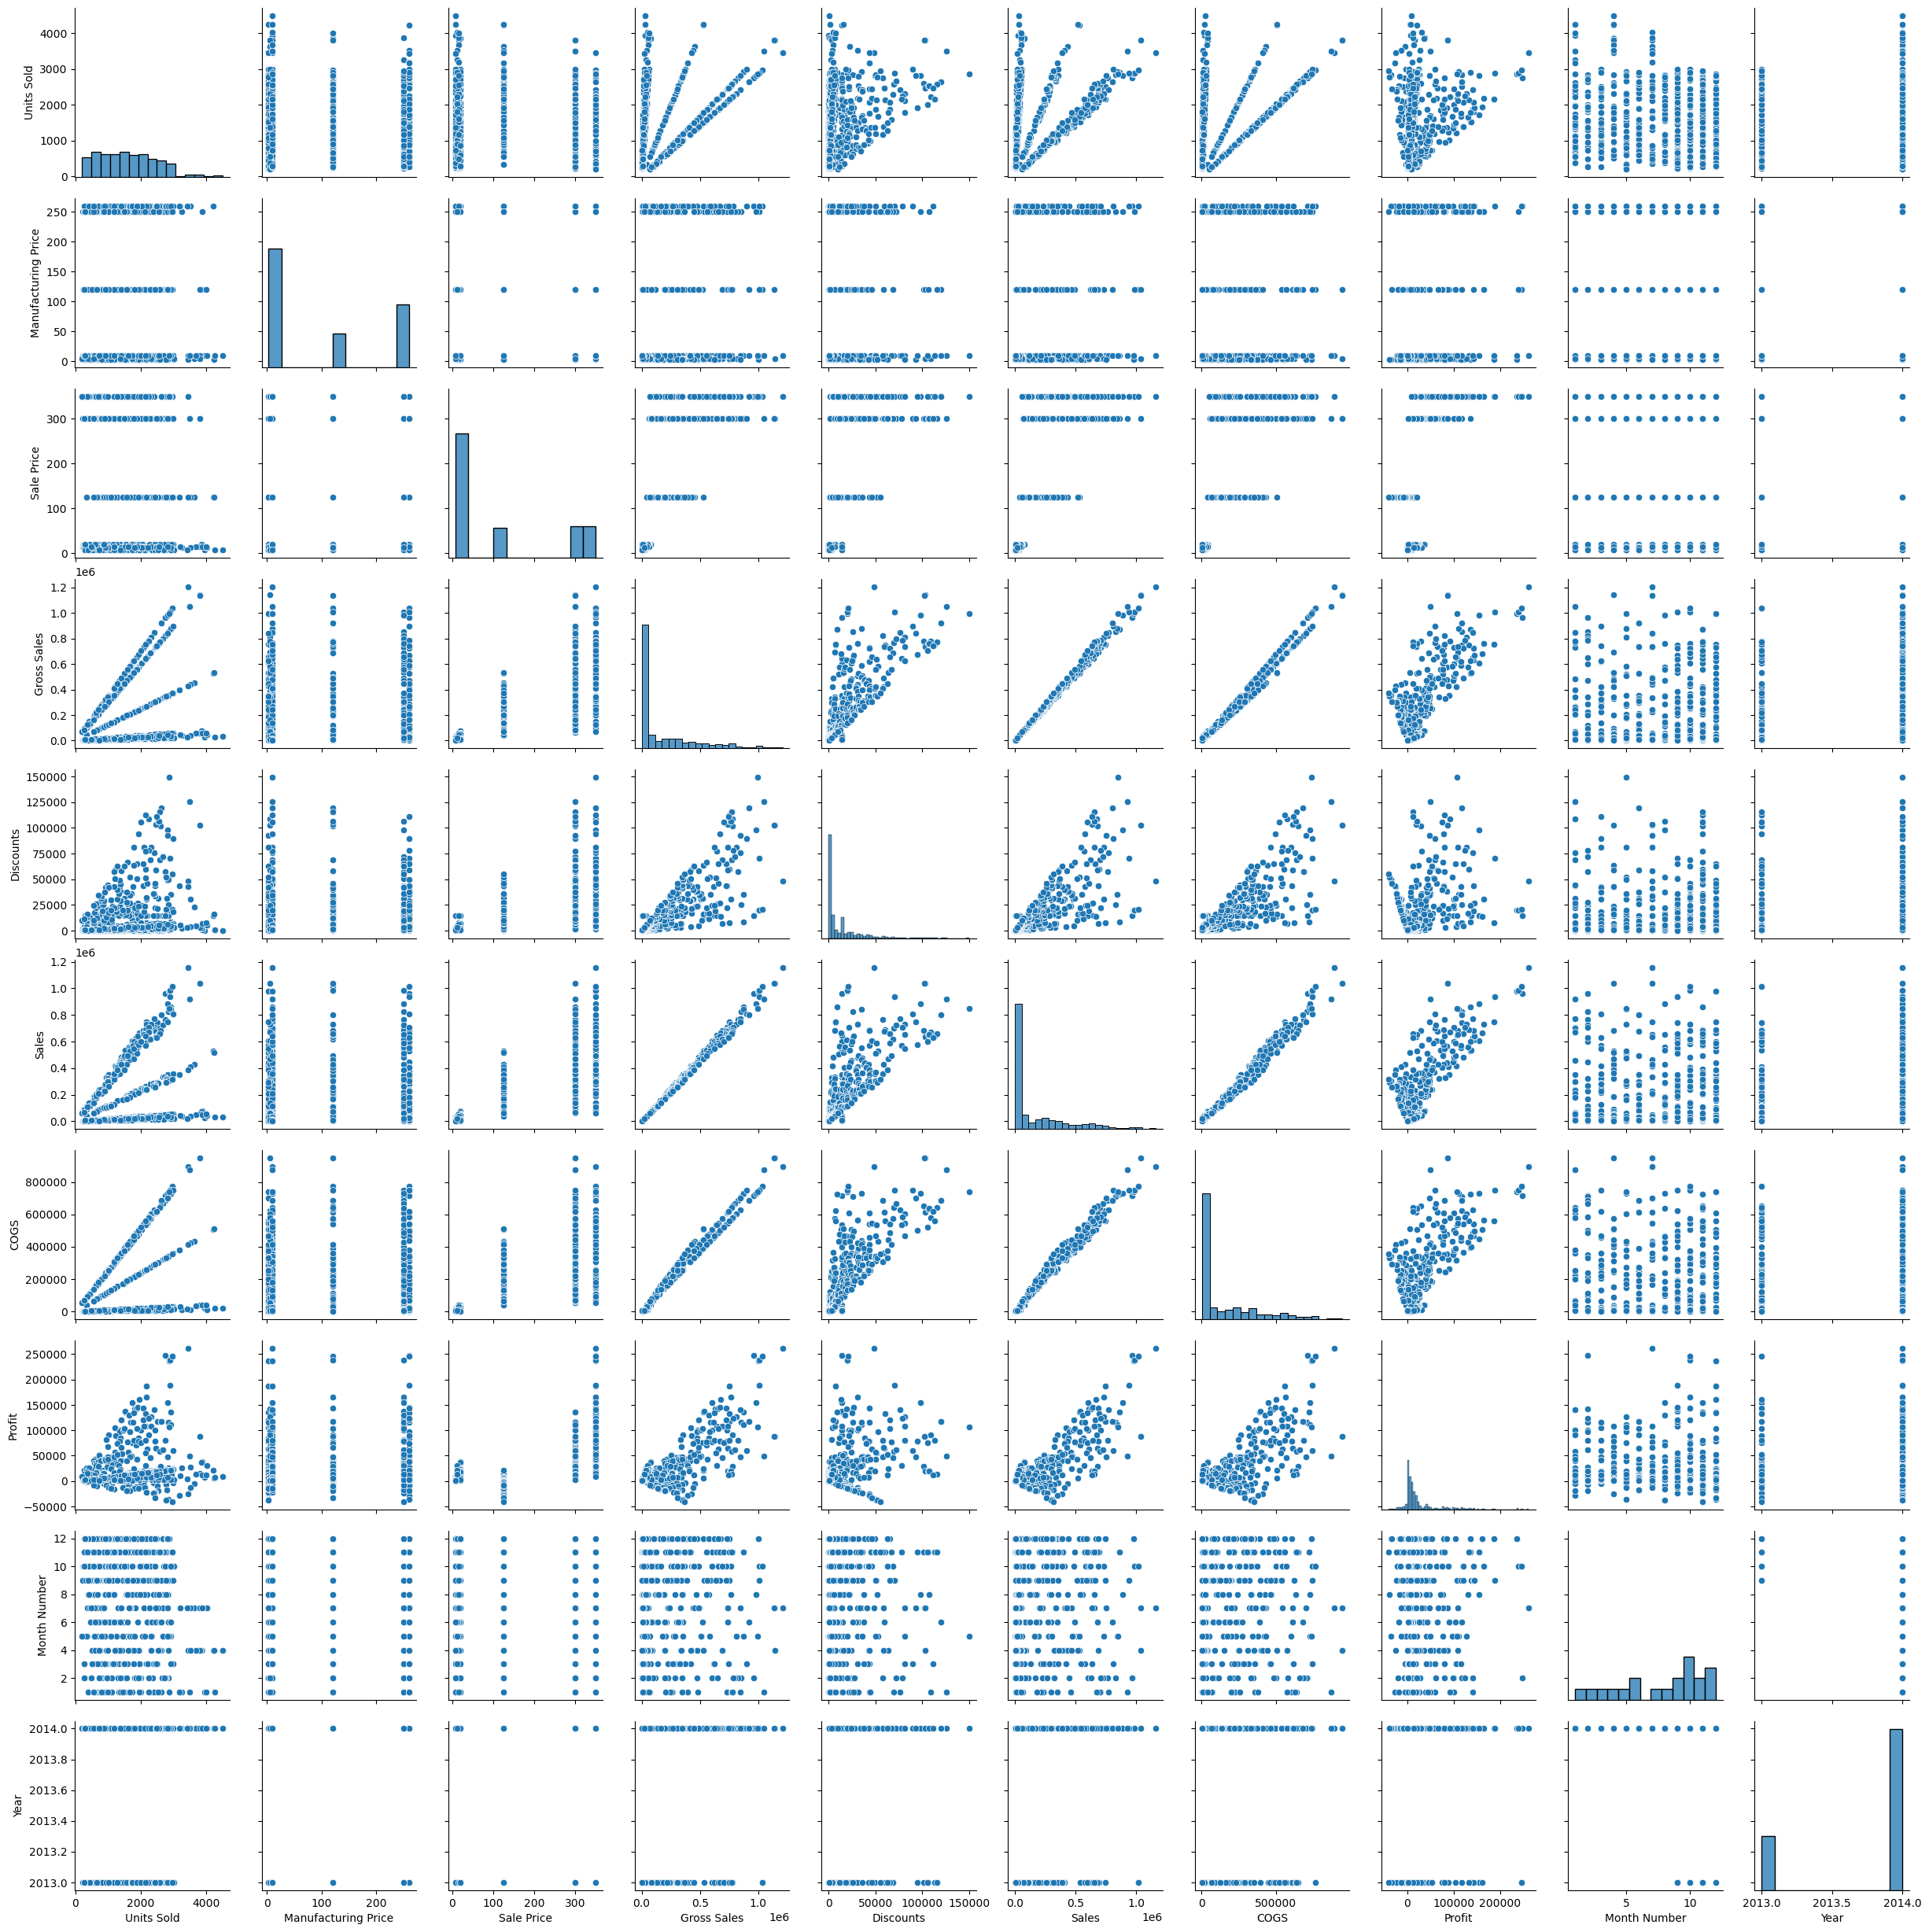

In [49]:
sns.pairplot(data = df_financials)

In [56]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()

In [60]:
df_financials[['Month Number','Year','Units Sold','Manufacturing Price','Sale Price','Gross Sales','Sales','COGS','Profit']] = scaler.fit_transform(df_financials[['Month Number','Year','Units Sold','Manufacturing Price','Sale Price','Gross Sales','Sales','COGS','Profit']])

In [ ]:
df_financials.groupby('Country')['Units Sold'].mean().sort_values(ascending = True)

In [ ]:
sns.boxplot(x='Product_Category', y='Profit', data=df)